## CSCI316 Assignment 2 (Group 6)

### Student Name: Lee Yu Xian
### Student Number: 7233164
### Student Name: Chong Hui Wen
### Student Number: 7311436
### Student Name: Kaycee Tan Wan Ching
### Student Number: 7311540


In [1]:
#import all necessary libraries required 
import findspark
findspark.init()
import pyspark
import pandas as pd

from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import * 
from pyspark.ml import Pipeline 
from pyspark.ml.feature import StringIndexer 
from pyspark.ml.classification import NaiveBayes 
from pyspark.sql.types import IntegerType
from pyspark.ml.classification import RandomForestClassifier

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

### Discover and visualise the data

In [3]:
# define the header for each columns
columns_name = [
                "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"
            ]

In [4]:
#read file
df = spark.read.format("csv").option("header",False).option("delimiter",',').option("ignoreTrailingWhiteSpace", True).load("covtype.data")

In [5]:
#show the splitted data
#check if data is successfully splitted by printing the data 
df.show()
df

+----+---+---+---+---+----+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
| _c0|_c1|_c2|_c3|_c4| _c5|_c6|_c7|_c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|_c41|_c42|_c43|_c44|_c45|_c46|_c47|_c48|_c49|_c50|_c51|_c52|_c53|_c54|
+----+---+---+---+---+----+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|2596| 51|  3|258|  0| 510|221|232|148|6279|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0| 

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string, _c14: string, _c15: string, _c16: string, _c17: string, _c18: string, _c19: string, _c20: string, _c21: string, _c22: string, _c23: string, _c24: string, _c25: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string, _c31: string, _c32: string, _c33: string, _c34: string, _c35: string, _c36: string, _c37: string, _c38: string, _c39: string, _c40: string, _c41: string, _c42: string, _c43: string, _c44: string, _c45: string, _c46: string, _c47: string, _c48: string, _c49: string, _c50: string, _c51: string, _c52: string, _c53: string, _c54: string]

In [6]:
#Listing the column names and assigning them 
newColNames =  [
                "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"]

df = df.toDF(*newColNames)

In [7]:
#show that values are assigned to the columns respectively
df.show()

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+-----------------+-----------------+-----------------+-----------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wildernes

In [8]:
#convert to pandas
p_df = df.toPandas()

In [9]:
p_df.shape

(581012, 55)

#### Findings:

(1) Based on the Pandas' .shape function, it shows this dataframe contains 581012 rows and 55 columns (including target column).

In [10]:
print(p_df['Cover_Type'].unique())

['5' '2' '1' '7' '3' '6' '4']


In [11]:
#show the data 
p_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [12]:
#Checking data frame variable type 
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           581012 non-null  object
 1   Aspect                              581012 non-null  object
 2   Slope                               581012 non-null  object
 3   Horizontal_Distance_To_Hydrology    581012 non-null  object
 4   Vertical_Distance_To_Hydrology      581012 non-null  object
 5   Horizontal_Distance_To_Roadways     581012 non-null  object
 6   Hillshade_9am                       581012 non-null  object
 7   Hillshade_Noon                      581012 non-null  object
 8   Hillshade_3pm                       581012 non-null  object
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  object
 10  Wilderness_Area_1                   581012 non-null  object
 11  Wilderness_Area_2                   581

In [13]:
#convert variable type to int for plotting 
p_df = p_df.astype(int)
#check if variables have been changed to int successfully 
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int32
 1   Aspect                              581012 non-null  int32
 2   Slope                               581012 non-null  int32
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int32
 4   Vertical_Distance_To_Hydrology      581012 non-null  int32
 5   Horizontal_Distance_To_Roadways     581012 non-null  int32
 6   Hillshade_9am                       581012 non-null  int32
 7   Hillshade_Noon                      581012 non-null  int32
 8   Hillshade_3pm                       581012 non-null  int32
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int32
 10  Wilderness_Area_1                   581012 non-null  int32
 11  Wilderness_Area_2                   581012 non-null 

In [14]:
#print skewness of all the features 
print('Skewness of all the features: ')
skewness = p_df.skew()
print(skewness)

Skewness of all the features: 
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area_1                       0.205618
Wilderness_Area_2                       4.061595
Wilderness_Area_3                       0.257822
Wilderness_Area_4                       3.575561
Soil_Type_1                            13.736670
Soil_Type_2                             8.615358
Soil_Type_3                            10.838630
Soil_Type_4                             6.625176
Soil_Type_5                            18.995243
Soil_Type_6                           

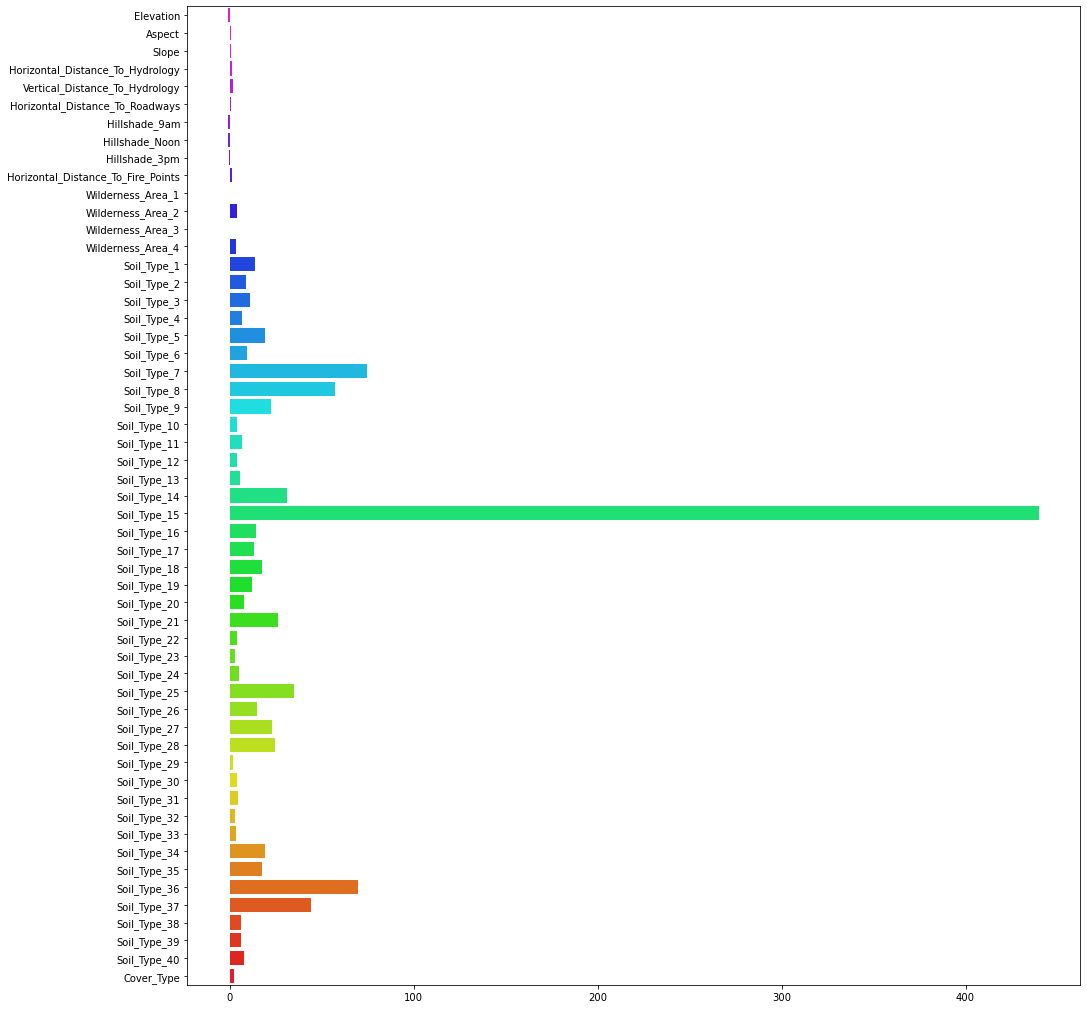

In [15]:
# set up the figure size 
plt.figure(figsize=(16,18))

# plot out the diagram to have a clear view of the skewness
sns.barplot(x=p_df.skew(), y=skewness.index, palette = 'gist_rainbow_r')

# show the plot
plt.show()

#### Findings:

Usage_kWh                               1.197394
Lagging_Current_Reactive.Power_kVarh    1.437899
Leading_Current_Reactive_Power_kVarh    1.734314
CO2(tCO2)                               1.149355

Leading_Current_Power_Factor           -1.511984

(1) Usage_kWh, Lagging_Current_Reactive, Leading_Current_Reactive and CO2(tCO2) are extremely right skewed. (Having values more than 1)
(2) Leading_Current_Power_Factor is extremely left skewed. (Having values less than 1)

In [16]:
#  returns the correlation matrix of the dataframe
p_df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


In [17]:
#  returns the correlation matrix of the dataframe
corr_matrix = p_df.corr()
corr_matrix = corr_matrix['Cover_Type'].sort_values(ascending=False)
corr_matrix

Cover_Type                            1.000000
Wilderness_Area_4                     0.323200
Soil_Type_10                          0.243876
Soil_Type_38                          0.160170
Soil_Type_39                          0.155668
Slope                                 0.148285
Soil_Type_40                          0.128351
Soil_Type_2                           0.118135
Soil_Type_6                           0.112958
Soil_Type_4                           0.099672
Soil_Type_1                           0.090828
Soil_Type_17                          0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type_35                          0.080315
Soil_Type_37                          0.080271
Soil_Type_5                           0.077890
Soil_Type_3                           0.068064
Wilderness_Area_3                     0.066846
Soil_Type_14                          0.065562
Soil_Type_11                          0.035379
Soil_Type_36                          0.025397
Soil_Type_13 

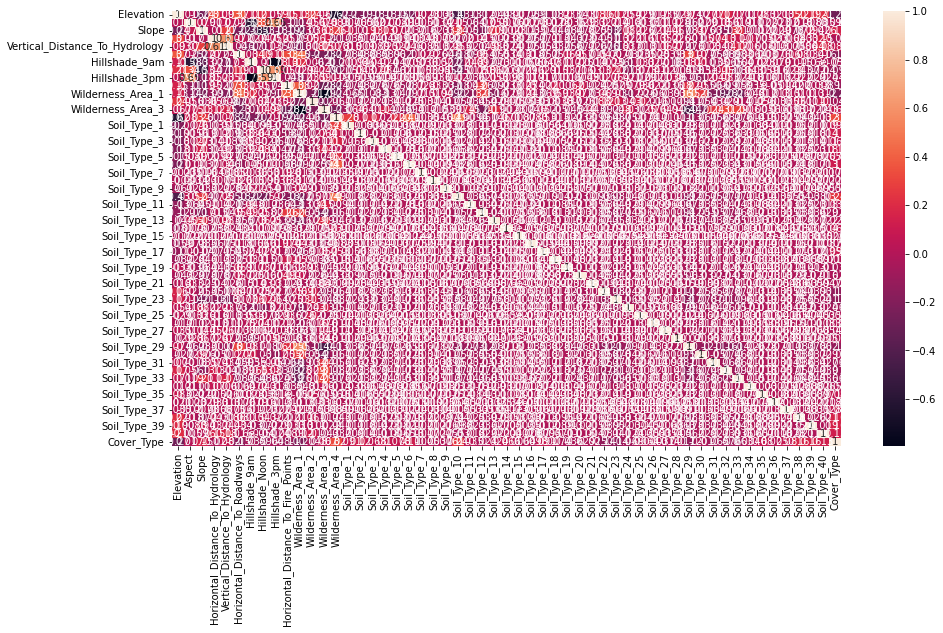

In [18]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(15,8))

# using heapmap to plot
sns.heatmap(p_df.corr(), annot=True)

# show the plot
plt.show()

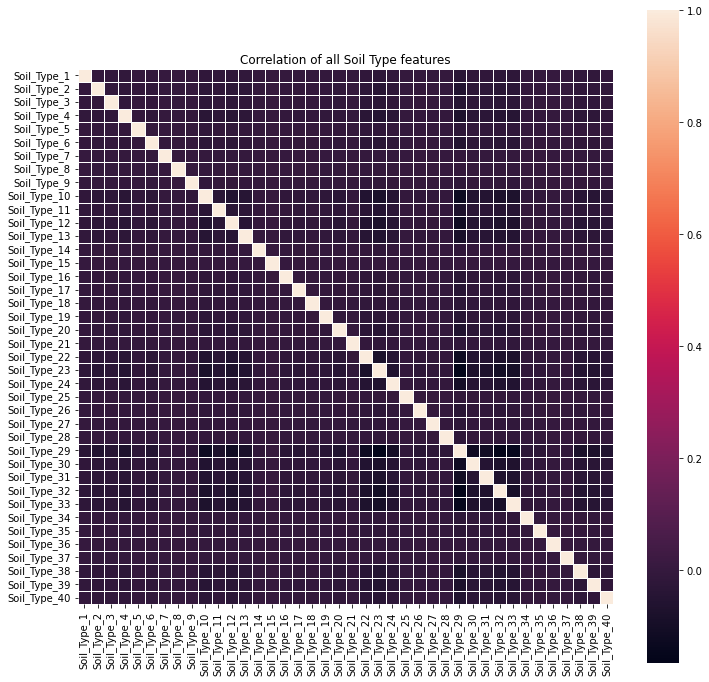

In [19]:
# Stores all Soil Type features
columns = [cols for cols in p_df.columns if str(cols).startswith('Soil')]

# set figure size
plt.figure(figsize=(12, 12))

# plot heat map
sns.heatmap(p_df[columns].corr(), square=True, linewidths=1)

# set title of the plot
plt.title('Correlation of all Soil Type features')

# show the plot
plt.show()

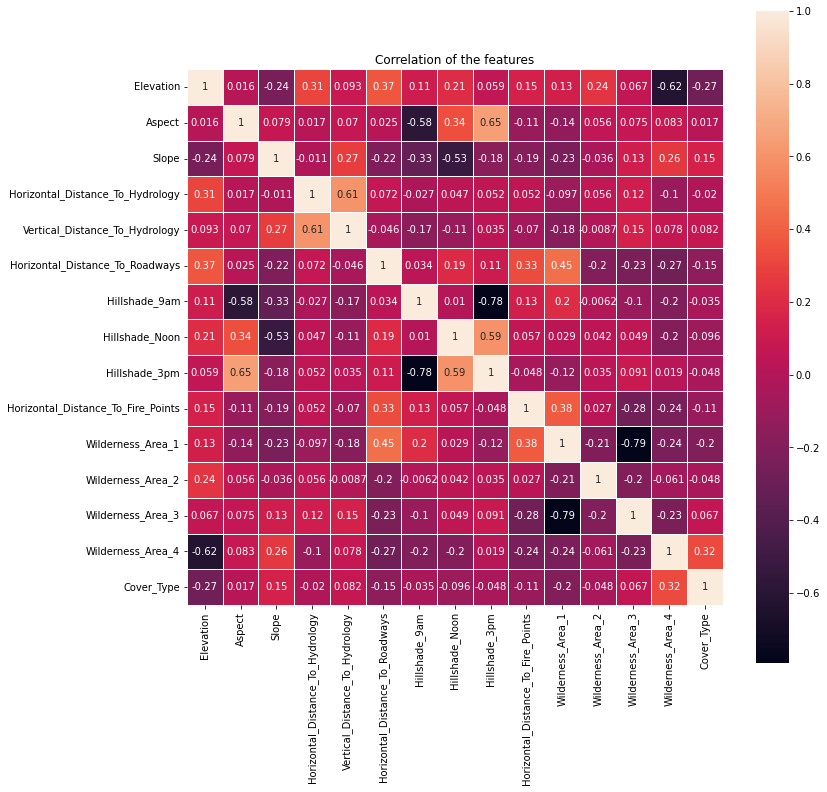

In [20]:
# get and store all the not Soil Type features
columns = [cols for cols in p_df.columns if not str(cols).startswith('Soil')]

# set the figure size
plt.figure(figsize=(12, 12))

# using heapmap to plot
sns.heatmap(p_df[columns].corr(), square=True, linewidths=1, annot = True)

# set the title of the plot
plt.title('Correlation of the features')

# show the plot
plt.show()

# Findings

(1) There seems to be positive correlations against 'Load_Type' with  attributes such as 'Usage_kWh','CO2(tCO2)','Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM' with p value close to and greater than 0.5

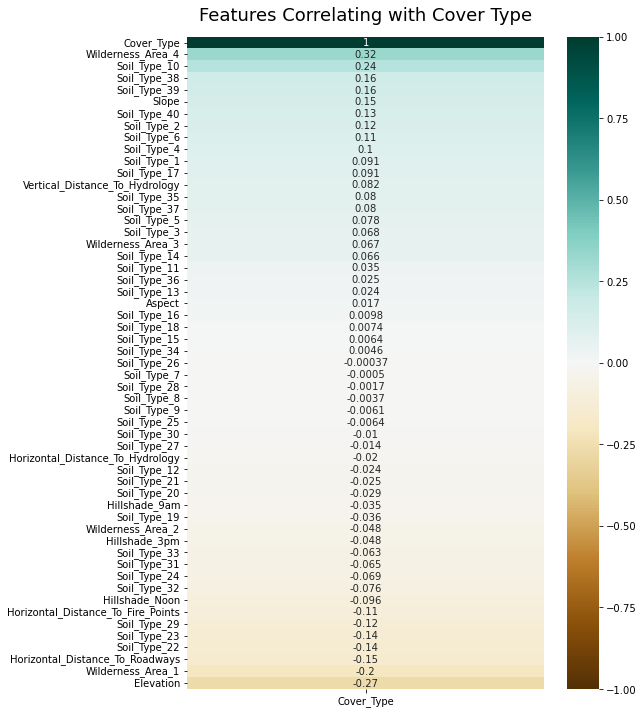

In [21]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(p_df.corr()[['Cover_Type']].sort_values(by='Cover_Type', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Cover Type', fontdict={'fontsize':18}, pad=16);

### Findings:
0.9 to 1 positive or negative indicates a very strong correlation. 0.7 to 0.9 positive or negative indicates a strong correlation. 0.5 to 0.7 positive or negative indicates a moderate correlation. 0.3 to 0.5 positive or negative indicates a weak correlation. 0 to 0.3 positive or negative indicates a negligible correlation.

Based on above, it can be observed that:

(1) CO2 (tCO2) has a strong positive correlation with the target (Load_Type) of 0.61. As such, this means that we will be able to get more cohesive information from CO2 (tCO2) for Load_Type.

(2) Next, as seen from the figure, Usage_kWh also has a strong positive correlation with the target (Load_Type), giving it 0.61. This also means that we can retrieve useful information for Load_Type.

(3) The weakest correlation amongst the attributes would be Leading_Current_Reactive_Power_kVarh, of which gives a negative correlation of 0.0018. As such, we are unable to use the attribute to get useful information regarding Load_Type.

(4) The second weakest correlation is Leading_Current_Power_Factor which give a negative correlation of -0.075.

In [22]:
# show the total number of each cover types in this dataframe
p_df.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

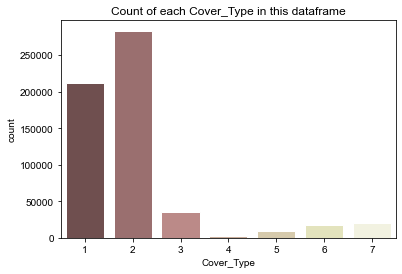

In [23]:
# visualize the count of each 'Cover_Type' in this dataframe
plt.title('Count of each Cover_Type in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=p_df['Cover_Type'], palette = 'pink')

plt.show()

### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

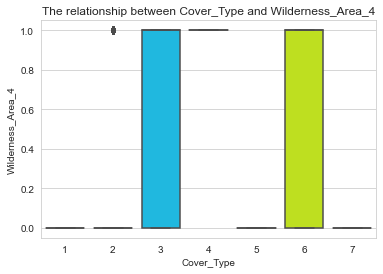

In [24]:
# Visualize the relationship between Cover_Type and Wilderness_Area_4
plt.title('The relationship between Cover_Type and Wilderness_Area_4')
graph = sns.boxplot(data=p_df, x='Cover_Type', y='Wilderness_Area_4', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

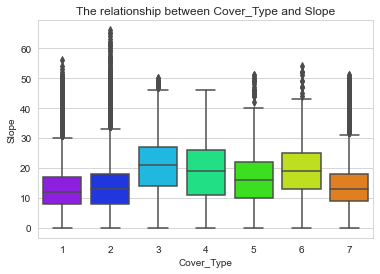

In [25]:
# Visualize the relationship between Cover_Type and slope
plt.title('The relationship between Cover_Type and Slope')
sns.boxplot(data=p_df, x='Cover_Type', y='Slope', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

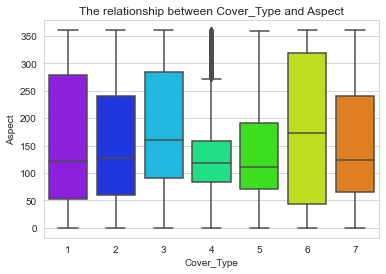

In [26]:
# Visualize the relationship between Cover_type and aspect
plt.title('The relationship between Cover_Type and Aspect')
sns.boxplot(data=p_df, x='Cover_Type', y='Aspect', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

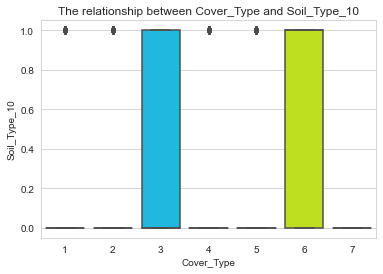

In [27]:
# Visualize the relationship between Cover_Type and Soil_Type_10
plt.title('The relationship between Cover_Type and Soil_Type_10')
sns.boxplot(data=p_df, x='Cover_Type', y='Soil_Type_10', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

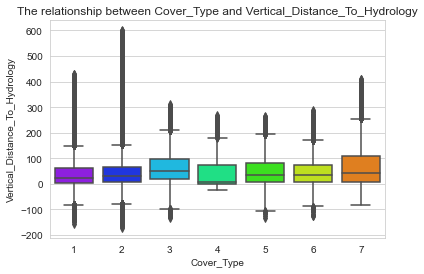

In [28]:
# Visualize the relationship between Cover_type and Vertical_Distance_To_Hydrology
plt.title('The relationship between Cover_Type and Vertical_Distance_To_Hydrology')
sns.boxplot(data=p_df, x='Cover_Type', y='Vertical_Distance_To_Hydrology', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

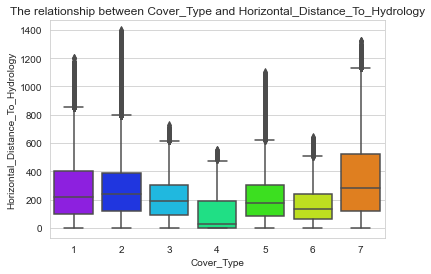

In [29]:
# Visualize the relationship between Cover_type and Horizontal_Distance_To_Hydrology
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Hydrology')
sns.boxplot(data=p_df, x='Cover_Type', y='Horizontal_Distance_To_Hydrology', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

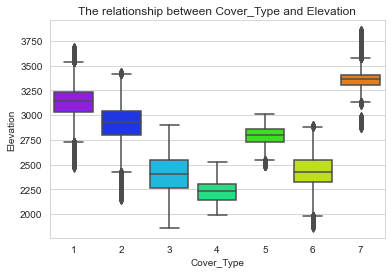

In [30]:
# Visualize the relationship between Cover_Type and Elevation
plt.title('The relationship between Cover_Type and Elevation')
graph = sns.boxplot(data=p_df, x='Cover_Type', y='Elevation', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

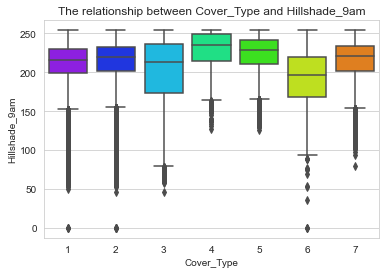

In [31]:
# Visualize the relationship between Cover_type and Hillshade_9am
plt.title('The relationship between Cover_Type and Hillshade_9am')
sns.boxplot(data=p_df, x='Cover_Type', y='Hillshade_9am', palette='gist_rainbow_r')

plt.show()

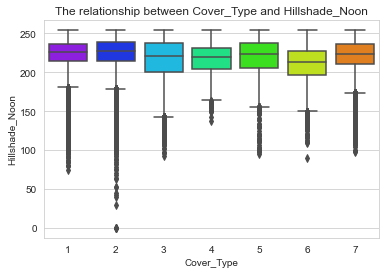

In [32]:
# Visualize the relationship between Cover_type and Hillshade_Noon
plt.title('The relationship between Cover_Type and Hillshade_Noon')
sns.boxplot(data=p_df, x='Cover_Type', y='Hillshade_Noon', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

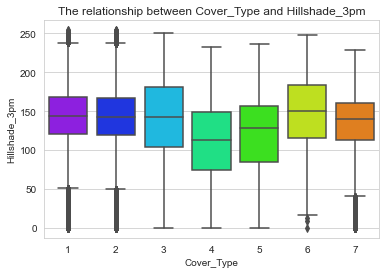

In [33]:
# Visualize the relationship between Cover_type and Hillshade_3pm
plt.title('The relationship between Cover_Type and Hillshade_3pm')
sns.boxplot(data=p_df, x='Cover_Type', y='Hillshade_3pm', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

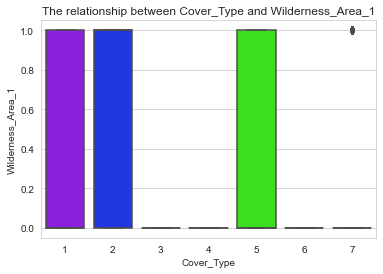

In [34]:
# Visualize the relationship between Cover_Type and Wilderness_Area_1
plt.title('The relationship between Cover_Type and Wilderness_Area_1')

graph = sns.boxplot(data=p_df, x='Cover_Type', y='Wilderness_Area_1', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

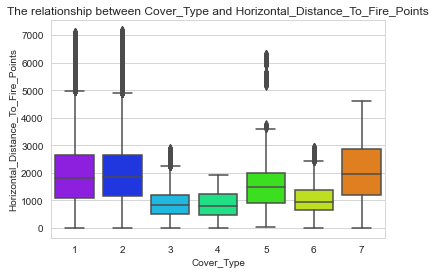

In [35]:
# Visualize the relationship between Cover_type and Horizontal_Distance_To_Fire_Points
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Fire_Points')
sns.boxplot(data=p_df, x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) The highest number of count of Load_Type is Light_Load, consisting of count 18072.

(2) The second most count for Load_Type would be Medium_Load.

(3) The least number of count of Load_Type is Maximum_Load.

(4) As such, the figure shows that Light_Load and Medium_Load are the most frequently used type of Load_Type.

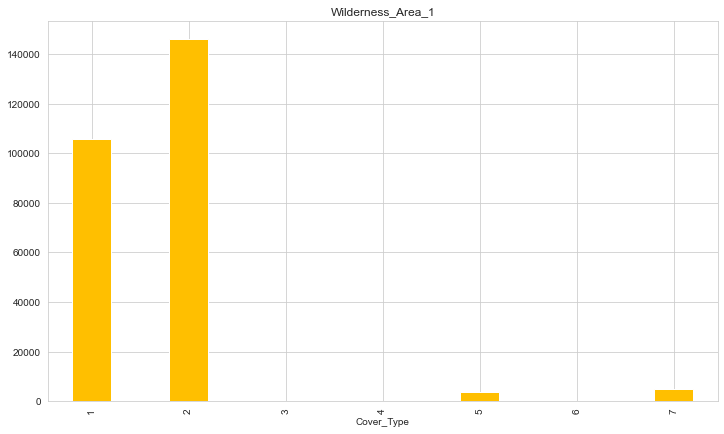

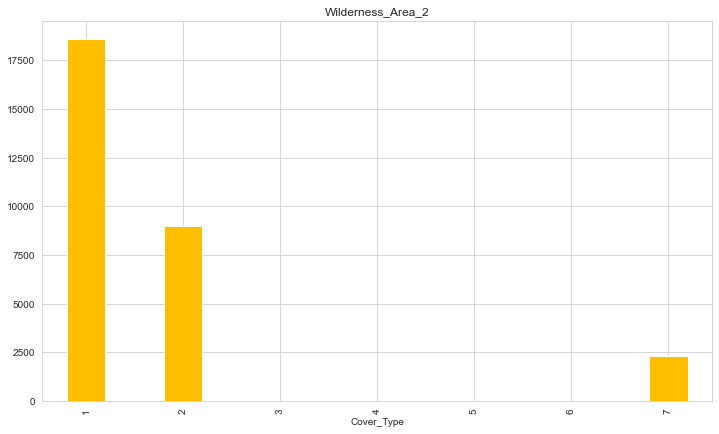

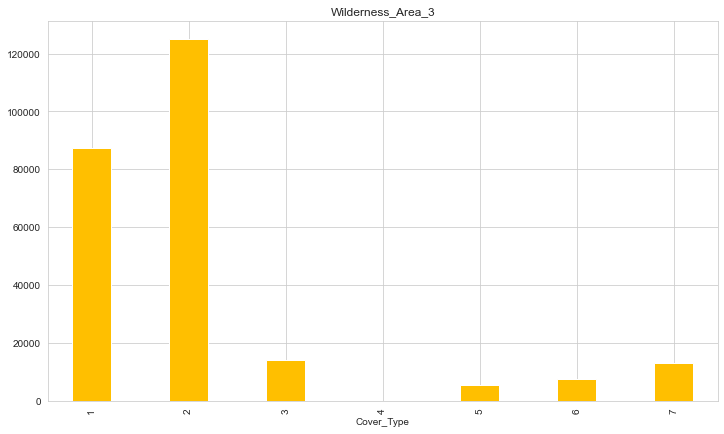

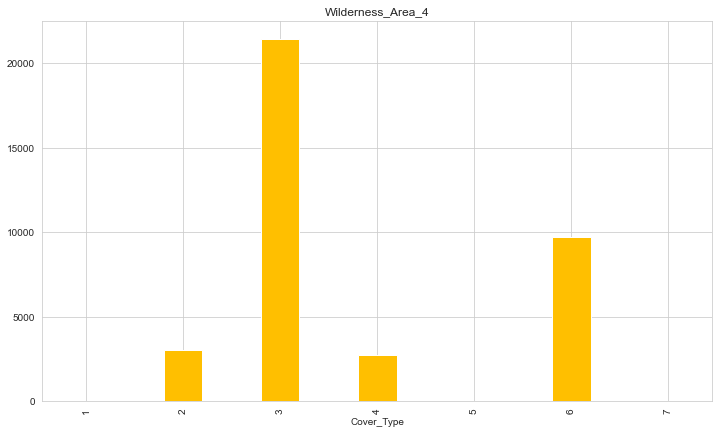

In [36]:
# define the columns to be plotted out
areas = ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']
    
# using for loop to generate the graph
for i in range(len(areas)):
    
    # plot i number of graphs
    plt.figure(i, figsize=(12, 7))
 
    # group by each of the cover type and sum each of them
    p_df.groupby('Cover_Type')[areas[i]].sum().plot.bar(width = 0.4, color='#ffbf00')
    
    # display the title name
    plt.title(areas[i])

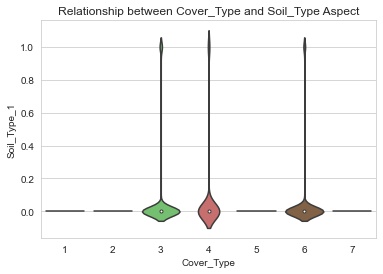

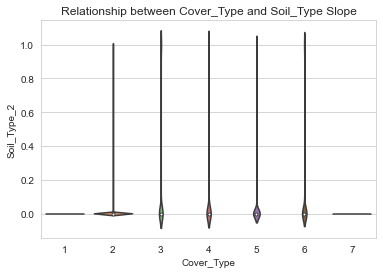

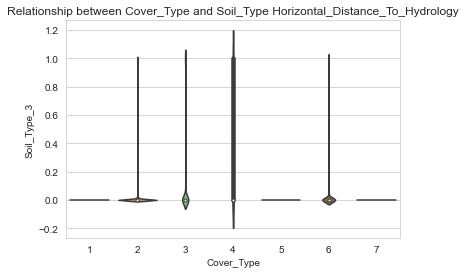

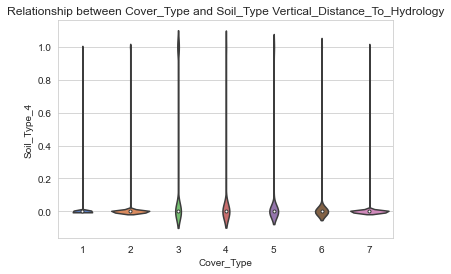

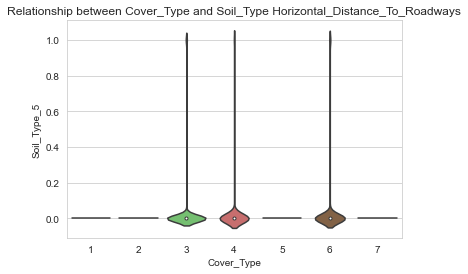

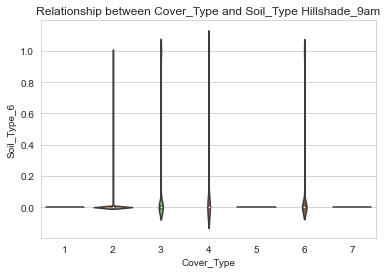

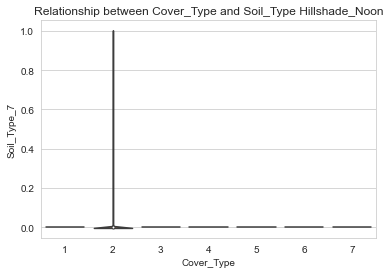

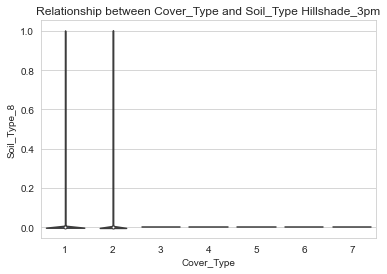

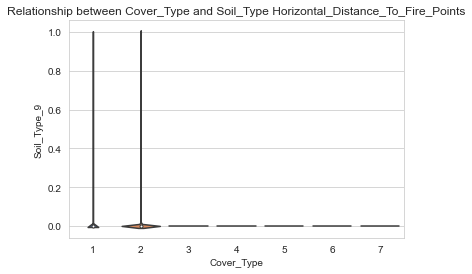

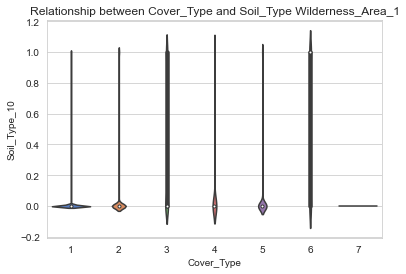

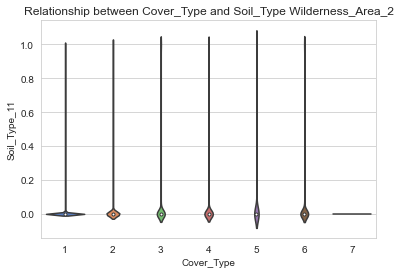

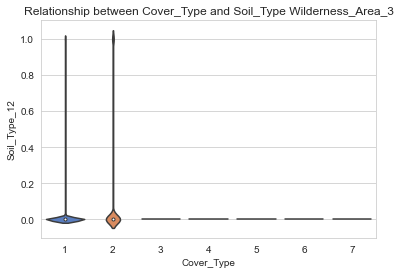

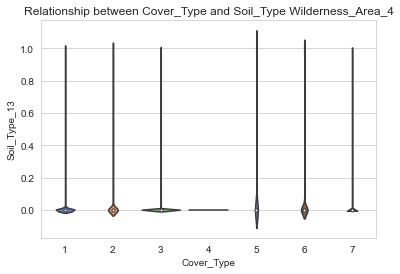

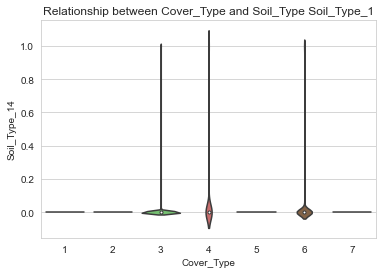

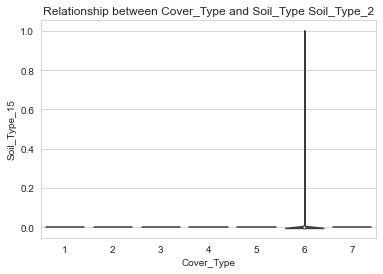

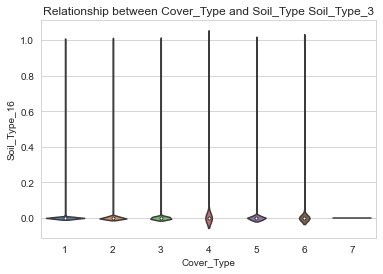

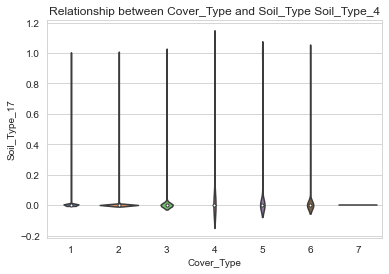

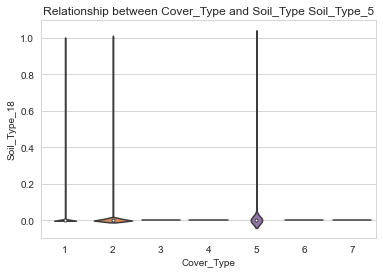

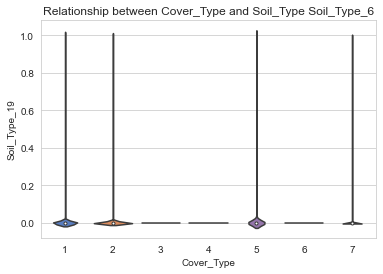

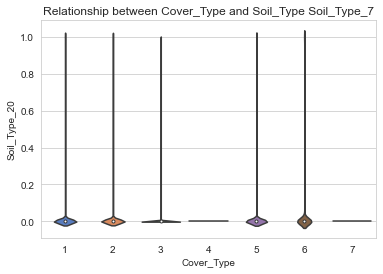

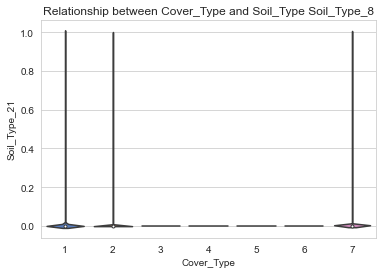

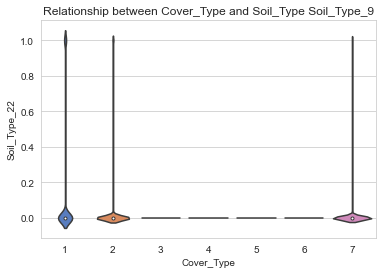

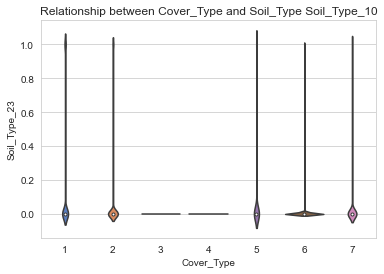

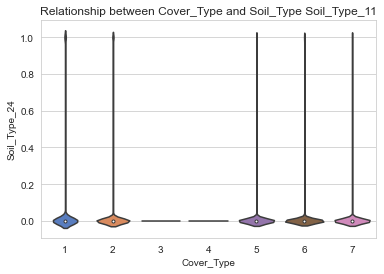

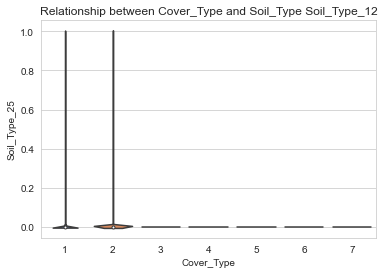

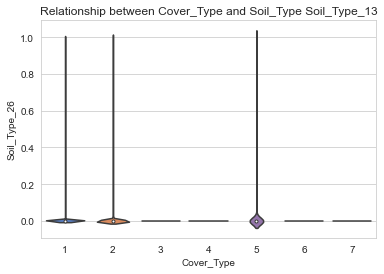

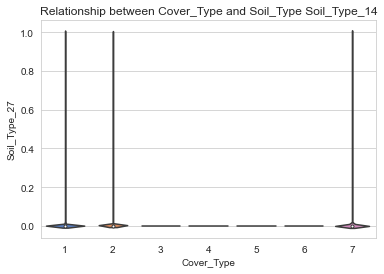

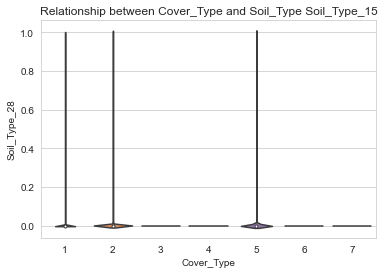

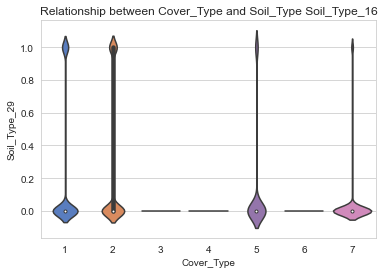

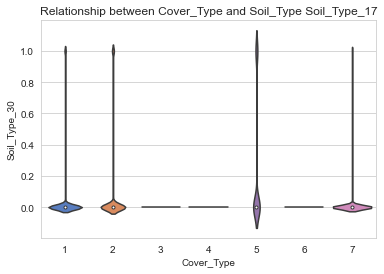

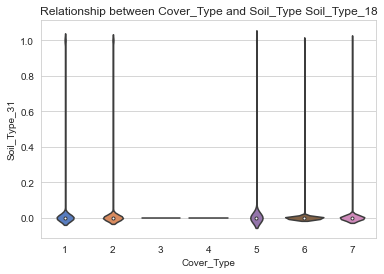

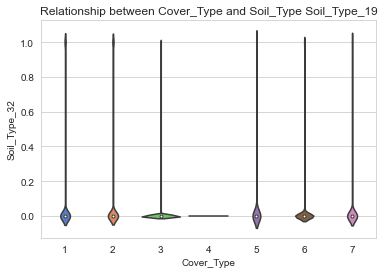

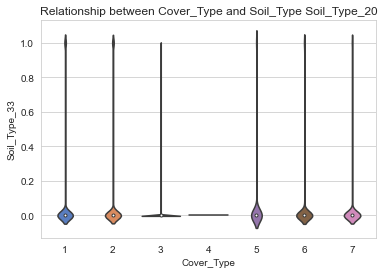

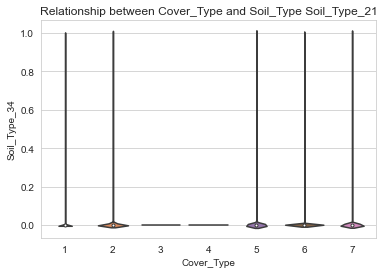

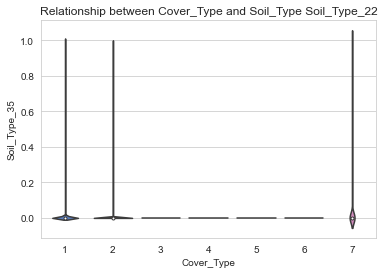

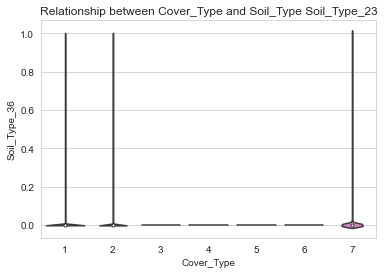

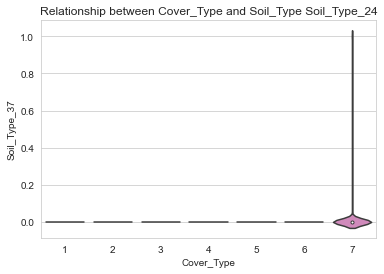

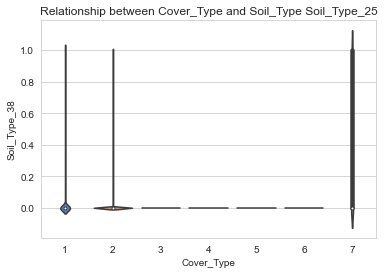

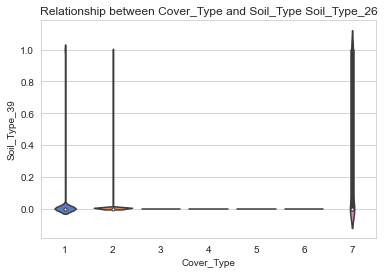

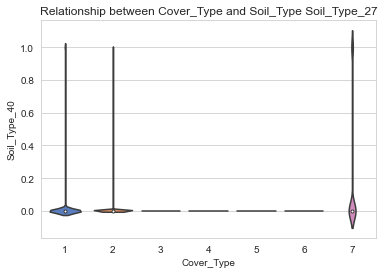

In [37]:
# get all columns name
all_columns = p_df.columns

# eliminate the target column
eliminate_target = len(all_columns)-1

# x-axis is for target column
x = all_columns[eliminate_target]

# y-axis is for the features
y = all_columns[14:eliminate_target]

# plot out the graph
for a in range(0, 40):
    sns.violinplot(data=p_df, x=x, y=y[a], palette="muted")
    
    # set the title for each of the graphes
    plt.title('Relationship between Cover_Type and Soil_Type ' + all_columns[a+1])
    plt.show()

### Findings:
(1) "Relationship between Load_Type and Usage_kWh" - Medium_Load and Maximum_Load have lower frequency compared to Light_Load. Majority of the data for Light_Load are low valued.

(2) "Relationship between Load_Type and Lagging_Current_Reactive.Power_kVarh" - Data for Maximum_Load is distributed more evenly compared to Light_Load and Medium_Load where they have higher frequencies for low values.

(3) "Relationship between Load_Type and Leading_Current_Reactive_Power_kVarh" - Majority of the data are low valued for all 3 load types

(4) "Relationship between Load_Type and CO2(tCO2)" - Data is low valued for Light_Load while data are more evenly distributed at the decimal points for Medium_Load and Maximum_Load

(5) "Relationship between Load_Type and Lagging_Current_Power_Factor" - Majority of the data for Medium_Load and Maximum_Load are high valued, ranging from 80-110. Data for Light_Load is more evenly distributed between 40-150 range.

(6) "Relationship between Load_Type and Leading_Current_Power_Factor" - Data for Light_Load and Medium_Load are similar, with majority of the data at 20 or 100, while for Maximum_Load, majority of the data is at 100.

(7) "Relationship between Load_Type and NSM" - The median for Light_Load is slightly lower at 20000, while Medium_Load and Maximum_Load are higher at 65000 and 55000 respectively.

(8) "Relationship between Load_Type and WeekStatus" - The data for all 3 load types are similar, with majority of the data either at 0.0 or 1.0

(9) "Relationship between Load_Type and Day_of_week" - Data for all 3 load types are evenly distributed throughout.

## Prepare the data for machine learning algorithms

### Stratified split for training and testing dataset

In [38]:
df.groupBy("Cover_Type").count().show()

+----------+------+
|Cover_Type| count|
+----------+------+
|         7| 20510|
|         3| 35754|
|         5|  9493|
|         6| 17367|
|         1|211840|
|         4|  2747|
|         2|283301|
+----------+------+



In [39]:
for name in newColNames:
    df = df.withColumn(name,df[name].cast(IntegerType()))

In [40]:
numericCols = newColNames[:-1]
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
df = assembler.transform(df)

In [41]:
df.show(vertical = True)

-RECORD 0--------------------------------------------------
 Elevation                          | 2596                 
 Aspect                             | 51                   
 Slope                              | 3                    
 Horizontal_Distance_To_Hydrology   | 258                  
 Vertical_Distance_To_Hydrology     | 0                    
 Horizontal_Distance_To_Roadways    | 510                  
 Hillshade_9am                      | 221                  
 Hillshade_Noon                     | 232                  
 Hillshade_3pm                      | 148                  
 Horizontal_Distance_To_Fire_Points | 6279                 
 Wilderness_Area_1                  | 1                    
 Wilderness_Area_2                  | 0                    
 Wilderness_Area_3                  | 0                    
 Wilderness_Area_4                  | 0                    
 Soil_Type_1                        | 0                    
 Soil_Type_2                        | 0 

In [42]:
# Taking 70% of both 0's and 1's into training set
train = df.sampleBy("Cover_Type", fractions={1: 0.66,2: 0.66,3: 0.66,4: 0.66,5: 0.66,6: 0.66,7: 0.66}, seed=45698)
# Subtracting 'train' from original 'data' to get test set 
test = df.subtract(train)

In [43]:
train.groupBy("Cover_Type").count().show()

+----------+------+
|Cover_Type| count|
+----------+------+
|         1|139784|
|         6| 11390|
|         3| 23623|
|         5|  6197|
|         4|  1840|
|         7| 13527|
|         2|187008|
+----------+------+



In [44]:
test.groupBy("Cover_Type").count().show()

+----------+-----+
|Cover_Type|count|
+----------+-----+
|         1|72056|
|         6| 5977|
|         3|12131|
|         5| 3296|
|         4|  907|
|         7| 6983|
|         2|96293|
+----------+-----+



## (1) Random Forest Classifier

## (1) Random Forest Classifier Tuning

## (2) Naive Bayes Classifier

In [45]:
#Sets the Spark master URL to run locally. 
spark = SparkSession.builder.master("local[*]").getOrCreate()

## (2) Naive Bayes Classifier Tuning

## (3) Decision Tree Classifier

## (3) Decision Tree Classifier Tuning